The very first step we need to take for implementing YOLO algorithm is to install required liberaries.
We need to instll following liberaries:
1. OpenCV: Used for Computer vision problems, like facial recognition and detection.
2. PIL: Used for providing support for opening, manipulating and saving images of different formats.
3. Glob: The Glob module lists the files matching pattrens.
4. DarkFlow: DarkFlow and Darknet are tools to detect common object in images or videos. it is trained on alreaady trained weights.

**NOTE: Glob is part of standard liberary in python so we don't need to install it and here is link for Standard liberary in python "https://docs.python.org/3/library/index.html"**

In [1]:

# Installing required Liberaries
#!pip3 install opencv-python
#!pip3 install Pillow==2.2.2
#!git clone https://github.com/thtrieu/darkflow.git
#%cd darkflow
#!python3 setup.py build_ext --inplace+9-
#!pip3 install
#!pip3 install

Importing Liberaries

In [2]:
#Importing liberaries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Designing Network

In [3]:
YOLO_algorithum_model= cv2.dnn.readNet("../input/yolo-coco-data/yolov3.weights", "../input/yolo-coco-data/yolov3.cfg")

Now since we are done with designing a network, We will do two things.
1. We will form a list that will hold names of our classes.
2. We will check lenght of classes and names.

In [4]:
#Creating a list where we will save classes

Classes=[]

with open("../input/yolo-coco-data/coco.names", 'r') as F:
    Classes= F.read().splitlines()

In [5]:
#Lenght and names of classes

len(Classes)
#Classes

80

What we have done so for?
1. We called our model with pre-trained weights
2. We have uploaded our classes.

It's time to test our model.

Let's read any image.

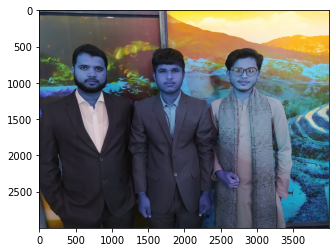

In [6]:
Image= cv2.imread("../input/another-r-t-image/IMG_20210102_134430.jpg")
#Image.shape
#width, height= Image.size
#print(width, height)
plt.imshow(Image)

With above code we have read the file but we have to things to consider.
1. The image is of integers and we have to regulaize it to get float.
2. This code takes image as "B_G_R" so we need to convert it into "R_G_B"

In [7]:
Test_image= cv2.dnn.blobFromImage(Image, 1/225, (512, 768), (0,0,0), swapRB= True, crop= False)

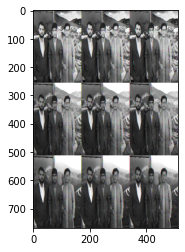

In [8]:
# Print image (Optional)

Test_image.shape
I= Test_image[0].reshape(768, 512, 3)
plt.imshow(I)

Now since we are done with all required preprocessing of our image that we read, We are goig to input it in our model.

In [9]:
YOLO_algorithum_model.setInput(Test_image)

Time to set output layer

In [10]:
#Setting output layers
Outlay_name= YOLO_algorithum_model.getUnconnectedOutLayersNames()
OutputL= YOLO_algorithum_model.forward(Outlay_name)

**Most Important Part**

for bounding boxes, confidence score and classes wee will make lists.
We will run for loop to get boxes and confidence score for each bounding box and class, then we will save them in lists.

In [11]:
#Creating lists for saving no: of bounding boxes, their confidence score and classes.
Boxes=[]
Confidence_score=[]
Classes_ID=[]

width=4300;
height=3200;

#Run through Image to find bounding boxes, their confidence and classes
for Output in OutputL:
    for detection in Output:
        score = detection[5:]
        Classes_id= np.argmax(score)
        Confidence= score[Classes_id]
        
#Preventing Multiple bunding boxes
        if Confidence > 0.7:
            center_x= int(detection[0]*width)
            center_y= int(detection[0]*height)
            w=int(detection[0]*width)
            h=int(detection[0]*height)
            
            x= int(center_x-w/2)
            y= int(center_y-h/2)
            
            Boxes.append([x,y,w,h])
            Confidence_score.append(float(Confidence))
            Classes_ID.append(Classes_id)
            
            

How many bounding boxes our algorithum has found in Input image.

In [12]:
#Finding the boxes in our image by our algorithum 
len(Boxes)

# Creating boxes
indexes= cv2.dnn.NMSBoxes(Boxes, Confidence_score, 0.5, 0.4)


Setting fonts and colors of boxes

In [13]:
font= cv2.FONT_HERSHEY_PLAIN
clr= np.random.uniform(0, 225, size = (len(Boxes), 3))

In [14]:
for i in indexes.flatten():
    x,y,w,h=Boxes[i]
    
    label= str(Classes[Classes_ID[i]])
    confidence=str(round(Confidence_score[i], 2))
    color= clr[i]
    
    cv2.rectangle(Image, (x,y), (x+w,y+h), color, 3)
    cv2.putText(Image, label+" "+confidence, (x,y+20), font, 2, (255,255,255), 3)

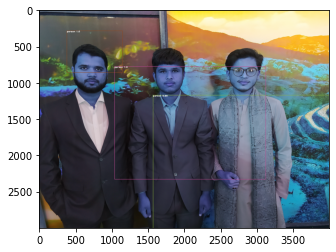

In [15]:
plt.imshow(Image)

In [16]:
cv2.imwrite("./another-r-t-image.jpg", Image)

True